In [196]:
# Importing Neccessary Classes
import pandas as pd
from datetime import datetime
import numpy as np
import re
import time as Time
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 

# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [125]:
user = '******'
passWord = '*********'

In [126]:
driver = webdriver.Chrome('../ChromeDriver/chromedriver') # getting driver ready
driver.get('https://www.instagram.com/')

In [127]:
# Getting UserName Password Text box
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')

In [128]:
# Filling UserName Password Text Box
username.send_keys(user)
password.send_keys(passWord)

In [129]:
# Submitting the Form to Login
password.submit()

In [137]:
# Saving Your Login info POPUP (NOT NOW)
driver.find_element_by_class_name('cmbtv').click()

In [139]:
# Turn On Ntification (OFF)
driver.find_element_by_class_name('HoLwm').click()

In [114]:
# Getting Followeers and Usernames of each handle
dataFrame = {
    'UserName':[],
    'Followers':[]
}
for i in range(10):
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.LWmhU input"))) 
    # Getting Search Box
    searchBox = driver.find_element_by_css_selector('div.LWmhU input')
    # Filling Search Box with "Food" 
    searchBox.send_keys('food')
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")) )
    driver.find_elements_by_class_name('yCE8d')[i].click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "g47SY")) )
    followers = driver.find_elements_by_class_name('g47SY')[1].text
    username = driver.find_element_by_class_name('_7UhW9').text
    dataFrame['UserName'].append(username)
    dataFrame['Followers'].append(followers)
    driver.get('https://www.instagram.com/')



In [115]:
# Cleaning Data
df = pd.DataFrame(dataFrame)
def f(s):
    if ',' in s:
        s= s.replace(',','')
    if 'k' in s:
        s = float(s[0:len(s)-1]) * 1000
    elif 'm' in s:
        s = float(s[0:len(s)-1]) * 1000000
    return int(s) 

df['Followers'] = df['Followers'].apply(f)

In [116]:
df.set_index('UserName',inplace=True)

In [118]:
# Top 5 
top_5 = df['Followers'].nlargest(5)
for i in range(len(top_5)):
    print(top_5.index[i] , top_5[i] )

dilsefoodie 565000
foodtalkindia 299000
food 61100
food_hacks_05 1704
food_e_aazam 1210


## 2. Now Find the number of posts these handles have done in the previous 3 days.

In [140]:
# Getting Followeers and Usernames of each handle
dataFrame = {
    'UserName':[],
    'Time':[]
}

for i in range(10):
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.LWmhU input"))) 
    # Getting Search Box
    searchBox = driver.find_element_by_css_selector('div.LWmhU input')
    # Filling Search Box with "Food"
    searchBox.clear()
    searchBox.send_keys('food')
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")) )
    handle = driver.find_elements_by_class_name('yCE8d')[i].text.split('\n')[0]
    if handle in list(top_5.index) :
        driver.find_elements_by_class_name('yCE8d')[i].click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.v1Nh3 a")) )
        posts = driver.find_elements_by_css_selector('div.v1Nh3 a')
        for post in posts:
            Time.sleep(2)
            post.click()
            current_time = datetime.now()
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "a.c-Yi7 time")) )
            
            time = driver.find_element_by_css_selector('a.c-Yi7 time').get_attribute('datetime')
            if(current_time  - datetime.fromisoformat(time[:-1])).days > 3:
                break
            dataFrame['UserName'].append(handle)
            dataFrame['Time'].append(time)
            
            # to get the close button
            close_btn = driver.find_element_by_css_selector('div.Igw0E button.wpO6b')
            close_btn.click()
        driver.get('https://www.instagram.com/')

df = pd.DataFrame(dataFrame)
df

,UserName,Time
0,foodtalkindia,2020-08-16T09:37:32.000Z
1,foodtalkindia,2020-08-16T09:17:44.000Z
2,foodtalkindia,2020-08-14T11:58:23.000Z
3,foodtalkindia,2020-08-13T08:45:14.000Z
4,dilsefoodie,2020-08-16T07:59:52.000Z
5,dilsefoodie,2020-08-15T11:40:05.000Z
6,dilsefoodie,2020-08-15T06:40:07.000Z
7,dilsefoodie,2020-08-14T07:16:49.000Z
8,dilsefoodie,2020-08-13T12:34:57.000Z
9,dilsefoodie,2020-08-13T07:09:02.000Z


In [141]:
# Number OF posts by all handles on previous 3 days
posts_3_days = df['UserName'].value_counts()
for i in range(len(posts_3_days)):
    print( posts_3_days.index[i] , posts_3_days[i] )

food 7
dilsefoodie 6
foodtalkindia 4
food_hacks_05 3


In [142]:
# Total Posts by All Top 5 Handles
df['UserName'].value_counts().sum()

20

### Depict this information using a suitable graph.

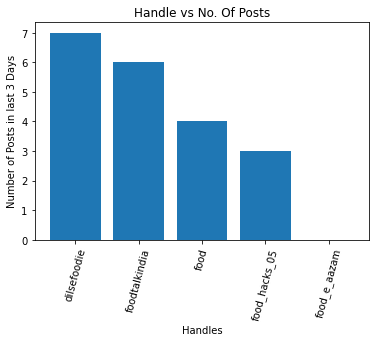

In [143]:
a = np.array(df['UserName'].value_counts())
a.resize(len(top_5.index))
plt.bar( top_5.index ,a  )
plt.xlabel('Handles')
plt.ylabel('Number of Posts in last 3 Days')
plt.title('Handle vs No. Of Posts')
plt.xticks(rotation = 75)
plt.show()

# Your friend also needs a list of hashtags that he should use in his posts.

### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [144]:
content=[]
for i in range(10):
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.LWmhU input"))) 
    # Getting Search Box
    searchBox = driver.find_element_by_css_selector('div.LWmhU input')
    # Filling Search Box with "Food"
    searchBox.clear()
    searchBox.send_keys('food')
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")) )
    handle = driver.find_elements_by_class_name('yCE8d')[i].text.split('\n')[0]
    if handle in list(top_5.index) :
        driver.find_elements_by_class_name('yCE8d')[i].click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.v1Nh3 a")) )
        posts = driver.find_elements_by_css_selector('div.v1Nh3 a')[:10]
        for post in posts:
            Time.sleep(2)
            post.click()
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "a.c-Yi7 time")) )
            content.append( driver.find_element_by_css_selector('div.C4VMK ').text)
            
            # to get the close button
            close_btn = driver.find_element_by_css_selector('div.Igw0E button.wpO6b')
            close_btn.click()
        driver.get('https://www.instagram.com/')
content

['food_e_aazam\nHomemade Fudgy Chocolate Cake with whipped chocolate ganache frosting 🥧🍫🎂❤️\n\nNo maida, no refined sugar 🌾🌼\n.\n.\n.\n.\n.\n.\n.\n#foodblogger #brownie #chocolate #chocolatecake #cake #cakerecipe #ganache #chocolateganache #healthycake #wholewheatcake #recipes\n4w',
 'food_e_aazam\nHomemade almond brownies ❤️🍫💕🍨\n.\n.\n.\n.\n.\n.\n#foodblogger #brownie #almondbrownies #chocolate #chocolatecake #dessert #recipes #brownies #instagood #foodstagram #homemadebrownies\n5w',
 'food_e_aazam\nHomemade Oreo Ice cream 🍨🍦🍧🍫🥄💗\n.\n.\n.\n.\n.\n.\n#icecream #oreo #cookiesandcream #cookies #chocolate #homemadeicecream #vanilla\n5w',
 'food_e_aazam\nKorean Spicy Rameyeon from Dalgrak 🍜🌶️\n.\nSo delicious, so spicy, & absolutely perfect for cold weather. The soup was so full of flavour too 👌🍜🧡\n.\nVerdict - 8/10\nPrice - ₹270\n.\n.\n12w',
 'food_e_aazam\nChocoholic mousse cake and Tiramisu from Theobroma 🍰💕\n.\nThe mousse had three layers of chocolate; white, milk and dark with chocolat

### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [149]:
# Cleaning and Spliting the Words of each line 
words=[]
for i in content:
    for word in i.replace('\n',' ').strip().split(' '):
        words.append(word)
words

['food_e_aazam',
 'Homemade',
 'Fudgy',
 'Chocolate',
 'Cake',
 'with',
 'whipped',
 'chocolate',
 'ganache',
 'frosting',
 '🥧🍫🎂❤️',
 '',
 'No',
 'maida,',
 'no',
 'refined',
 'sugar',
 '🌾🌼',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '#foodblogger',
 '#brownie',
 '#chocolate',
 '#chocolatecake',
 '#cake',
 '#cakerecipe',
 '#ganache',
 '#chocolateganache',
 '#healthycake',
 '#wholewheatcake',
 '#recipes',
 '4w',
 'food_e_aazam',
 'Homemade',
 'almond',
 'brownies',
 '❤️🍫💕🍨',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '#foodblogger',
 '#brownie',
 '#almondbrownies',
 '#chocolate',
 '#chocolatecake',
 '#dessert',
 '#recipes',
 '#brownies',
 '#instagood',
 '#foodstagram',
 '#homemadebrownies',
 '5w',
 'food_e_aazam',
 'Homemade',
 'Oreo',
 'Ice',
 'cream',
 '🍨🍦🍧🍫🥄💗',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '#icecream',
 '#oreo',
 '#cookiesandcream',
 '#cookies',
 '#chocolate',
 '#homemadeicecream',
 '#vanilla',
 '5w',
 'food_e_aazam',
 'Korean',
 'Spicy',
 'Rameyeon',
 'from',
 'Dalgrak',
 '🍜🌶️',


In [151]:
# Frequency of Words
d={}
for i in words:
    d[i] = d.get(i,0) + 1
d = sorted(d.items(),key= lambda x : x[1] , reverse=True )
# Popular Words Frequency
for i in d:
    if i[0]!='':
        print( i[0] , i[1])

and 103
of 94
the 78
. 75
is 56
in 55
to 51
a 46
The 33
with 32
for 31
you 26
- 23
food 22
it 21
⁠ 21
👉👉 20
Verified 19
Coffee 16
on 13
get 13
have 13
from 12
your 12
fun 12
It 11
are 11
#food 11
😍 11
food_e_aazam 10
was 10
has 10
an 10
dilsefoodie 10
#yum 10
food_hacks_05 10
Follow 10
@food_hacks_05 10
🍴🍕🍔 10
facts 10
Use 10
hashtag 10
#⃣ 10
#food_hacks_05 10
featured... 10
foodtalkindia 9
or 9
also 9
#dilsefoodie 9
Food 9
wheat 9
lakh 9
May 9
& 8
perfect 8
be 8
can 8
at 8
as 8
by 8
....................................................... 8
Price 7
that 7
about 7
2d 7
1w 7
#recipes 6
milk 6
A 6
this 6
drink 6
all 6
4d 6
many 6
its 6
most 6
one 6
state 6
risk 6
no 5
so 5
Verdict 5
coffee 5
great 5
not 5
we 5
more 5
may 5
1. 5
up 5
rum 5
2. 5
3. 5
4. 5
world 5
their 5
who 5
which 5
This 5
And 5
#foodphotography 5
#foodie 5
net 5
#quiz 5
#quizinstagram 5
#quizz 5
#quizzes 5
#food_hacks_05quiz 5
#answer 5
#instafood 5
#foods 5
vitamin 5
sugar 4
#foodblogger 4
#instagood 4
#icecream 4
8/10 

#coffee 1
#Ethiopian 1
Yemenite 1
#cultural 1
significance 1
dates 1
back 1
14 1
centuries, 1
when 1
not) 1
discovered 1
#Yemen 1
Ethiopia... 1
depending 1
ask). 1
Whether 1
#Ethiopia 1
Yemen 1
topic 1
debate 1
#country 1
own 1
myths, 1
legends, 1
#facts 1
beverage's 1
origin. 1
#original 1
domesticated 1
#plant 1
Harar, 1
native 1
#population 1
thought 1
derived 1
Ethiopia 1
distinct 1
nearby 1
populations 1
#Sudan 1
#Kenya 1
primarily 1
consumed 1
#Islamic 1
#world 1
originated 1
directly 1
related 1
#religious 1
practices. 1
12 1
HEALTH 1
BENEFITS 1
boosts 1
physical 1
performance. 1
help 1
burn 1
fat. 1
focus 1
stay 1
alert. 1
death. 1
cancers. 1
stroke. 1
Parkinson’s 1
disease. 1
9. 1
body. 1
10. 1
lower 1
Type 1
II 1
diabetes. 1
11. 1
brain. 1
12. 1
brightens 1
mood, 1
fight 1
depression 1
suicide. 1
DISADVANTAGES 1
AND 1
RISKS 1
DRINKING 1
Bad 1
toxic. 1
kill 1
you. 1
cause 1
insomnia 1
restlessness. 1
pregnant. 1
cholesterol 1
please 1
choose 1
filtered 1
coffee. 1
kids, 1
incr

## Create a csv file with two columns : the word and its frequency

In [154]:
df = pd.DataFrame(d,columns=['Word','Frequncy'])
df.set_index('Word',inplace=True)
df.drop( index='',inplace=True)
df

,Frequncy
Word,
and,103
of,94
the,78
.,75
is,56
...,...
🍨🍦,1
@vadilalicecreams,1
@vadilalicecream,1


In [156]:
# CSV FILE
df.to_csv('Words.csv')

## Now, find the hashtags that were most popular among these bloggers

In [161]:
df.reset_index(inplace=True)
df

,Word,Frequncy
0,and,103
1,of,94
2,the,78
3,.,75
4,is,56
...,...,...
1897,🍨🍦,1
1898,@vadilalicecreams,1
1899,@vadilalicecream,1
1900,#desserts,1


In [166]:
most_popular_hashtags = df.loc[df['Word'].str.startswith('#')]
for i in range(len(most_popular_hashtags['Word'])):
    print(most_popular_hashtags['Word'].iloc[i] , most_popular_hashtags['Frequncy'].iloc[i])

#food 11
#yum 10
#⃣ 10
#food_hacks_05 10
#dilsefoodie 9
#recipes 6
#foodphotography 5
#foodie 5
#quiz 5
#quizinstagram 5
#quizz 5
#quizzes 5
#food_hacks_05quiz 5
#answer 5
#instafood 5
#foods 5
#foodblogger 4
#instagood 4
#icecream 4
#cheese 4
#healthyfood 4
#foodporn 4
#cheffeine 4
#chocolate 3
#eat 3
#love 3
#foodiesofinstagram 3
#instagram 3
#yummy 3
#india_ig 3
#nothingisordinary 3
#igfood 3
#foodilicious 3
#foodstyling 3
#brownie 2
#chocolatecake 2
#dessert 2
#foodstagram 2
#cookies 2
#delish 2
#cheesy 2
#summer 2
#foodpics 2
#tasty 2
#avocado 2
#butter 2
#delicious 2
#india 2
#indianfood 2
#foodinfo 2
#foodlover 2
#amazing 2
#cake 1
#cakerecipe 1
#ganache 1
#chocolateganache 1
#healthycake 1
#wholewheatcake 1
#almondbrownies 1
#brownies 1
#homemadebrownies 1
#oreo 1
#cookiesandcream 1
#homemadeicecream 1
#vanilla 1
#NewInTown 1
#HomeGrown 1
#Jameson 1
#IrishWhiskey 1
#AlwaysInToMixIn 1
#TrendTalk 1
#farzi 1
#InternationalBeerDay 1
#beerstagram 1
#AwesomenessWithSamsung 1
#Awesome

## Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [187]:
for i in range(5):
    print( most_popular_hashtags['Word'].iloc[i] , most_popular_hashtags['Frequncy'].iloc[i] )

#food 11
#yum 10
#⃣ 10
#food_hacks_05 10
#dilsefoodie 9


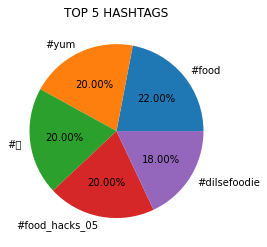

In [192]:
plt.pie( most_popular_hashtags['Frequncy'].iloc[:5] , labels=most_popular_hashtags['Word'].iloc[:5],autopct='%.2f%%')
plt.title('TOP 5 HASHTAGS')
plt.show()

# You need to also calculate average followers : likes ratio for the obtained handles.
# Followers : Likes ratio is calculated as follows:

### Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [200]:
# Getting Followeers and Usernames of each handle
dataFrame = {
    'UserName':[],
    'Likes':[]
}

for i in range(10):
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.LWmhU input"))) 
    # Getting Search Box
    searchBox = driver.find_element_by_css_selector('div.LWmhU input')
    # Filling Search Box with "Food"
    searchBox.clear()
    searchBox.send_keys('food')
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d")) )
    handle = driver.find_elements_by_class_name('yCE8d')[i].text.split('\n')[0]
    if handle in list(top_5.index) :
        driver.find_elements_by_class_name('yCE8d')[i].click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.v1Nh3 a")) )
        posts = driver.find_elements_by_css_selector('div.v1Nh3 a')
        for post in posts[:10]:
            Time.sleep(2)
            post.click()
            current_time = datetime.now()
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "a.c-Yi7 time")) )
            try:
                like = re.search( '\d+' , driver.find_element_by_class_name('Nm9Fw').text ).group()
            except:
                like='Video Profile No Likes Only Views'
                
            dataFrame['UserName'].append(handle)
            dataFrame['Likes'].append(like)
            
            # to get the close button
            close_btn = driver.find_element_by_css_selector('div.Igw0E button.wpO6b')
            close_btn.click()
        driver.get('https://www.instagram.com/')

df = pd.DataFrame(dataFrame)
df

,UserName,Likes
0,food_e_aazam,64
1,food_e_aazam,68
2,food_e_aazam,59
3,food_e_aazam,50
4,food_e_aazam,67
5,food_e_aazam,78
6,food_e_aazam,80
7,food_e_aazam,75
8,food_e_aazam,82
9,food_e_aazam,99


In [202]:
# DATA CLEANNING
def f(s):
    try:
        return int(s)
    except:
        return 0
df['Likes'] = df['Likes'].apply(f)
df

,UserName,Likes
0,food_e_aazam,64
1,food_e_aazam,68
2,food_e_aazam,59
3,food_e_aazam,50
4,food_e_aazam,67
5,food_e_aazam,78
6,food_e_aazam,80
7,food_e_aazam,75
8,food_e_aazam,82
9,food_e_aazam,99


In [206]:
# TOP 10 POSTS
most_popular = df['Likes'].nlargest(10)
for i in most_popular.index:
    print( df['UserName'].iloc[i] , df['Likes'].iloc[i] )

food 853
food 788
food 630
food_hacks_05 181
food_hacks_05 177
food_hacks_05 174
food_hacks_05 163
food_hacks_05 147
food_hacks_05 134
food_hacks_05 133


### Calculate the average likes for a handle.

In [212]:
# 0 Likes as last 10 post of that profile will be videoes
group_user = df.groupby('UserName')
avg_likes=group_user['Likes'].apply( lambda x : x.mean() ).sort_values(ascending=False)
for i in range(5):
    print( avg_likes.index[i] , avg_likes[i]  )

food 227.9
food_hacks_05 135.5
food_e_aazam 72.2
foodtalkindia 2.3
dilsefoodie 0.0


### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [231]:
# Followers
top_5.sort_index(inplace=True)

In [232]:
# Avg Likes
avg_likes.sort_index(inplace=True)

In [233]:
# LIKE RATIO :  Avg Likes / Number OF Followers
Like_Ratio =   avg_likes /top_5
Like_Ratio.sort_values(inplace=True)

In [234]:
# LIKE RATIO OF EACH HANDLE
for i in range(5):
    print( Like_Ratio.index[i] , Like_Ratio[i]  )

dilsefoodie 0.0
foodtalkindia 7.692307692307692e-06
food 0.0037299509001636664
food_e_aazam 0.059669421487603305
food_hacks_05 0.079518779342723


### Create a bar graph to depict the above obtained information. 

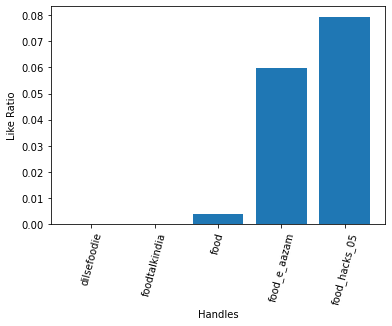

In [237]:
plt.bar(Like_Ratio.index,Like_Ratio)
plt.xticks(rotation=75)
plt.xlabel('Handles')
plt.ylabel('Like Ratio')
plt.show()